# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [53]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 rows, however some columns have null values (GRE = 2, GPA = 2, Prestige = 1)

#### Question 2. Create a summary table

In [ ]:
#function

In [5]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The scale of the GRE is from 0-800 while GPA is 0-4.0

#### Question 4. Drop data points with missing data


In [52]:
df_clean = df_raw.copy(deep=True)
df_clean_2 = df_clean.dropna(axis=0, how='any')
df_clean_2.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Code above shows that there are only 397 rows now and the percentile values are filled in, instead of being "NaN"

#### Question 6. Create box plots for GRE and GPA

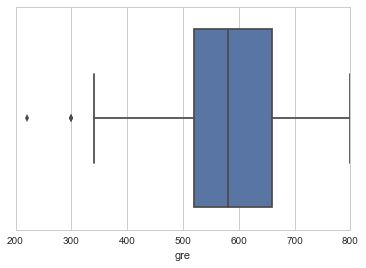

In [65]:
#boxplot 1
sns.set_style("whitegrid")
gre = df_clean_2['gre']
sns.boxplot(x=gre)

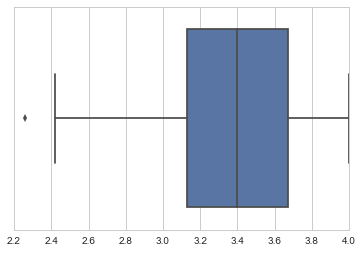

In [79]:
#boxplot 2 
sns.set_style("whitegrid")
gpa = np.array(df_clean_2['gpa'])
sns.boxplot(x=gpa)

#### Question 7. What do this plots show?

Answer: The Data shows that both variables have outliers that we should consider when modeling. Also it shows that the GPA variable has a slight left skew, while the GRE variable is a bit more symmetrical but still left skewed. 

#### Question 8. Describe each distribution 

(array([  3.,   4.,  16.,  32.,  42.,  57.,  76.,  65.,  39.,  63.]),
 array([ 2.26 ,  2.434,  2.608,  2.782,  2.956,  3.13 ,  3.304,  3.478,
         3.652,  3.826,  4.   ]),
 <a list of 10 Patch objects>)

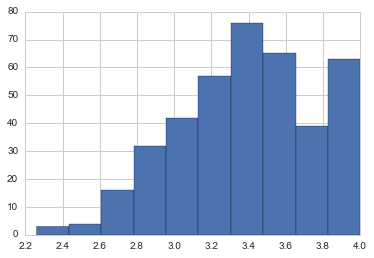

In [95]:
# plot the distribution of each variable 
plt.hist(gpa, bins=10)

(array([  1.,   3.,  16.,  28.,  50.,  75.,  81.,  64.,  44.,  35.]),
 array([ 220.,  278.,  336.,  394.,  452.,  510.,  568.,  626.,  684.,
         742.,  800.]),
 <a list of 10 Patch objects>)

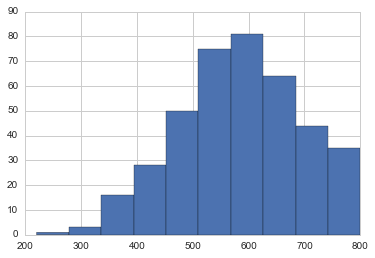

In [96]:
plt.hist(gre, bins=10)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes, the distribution of the two variables is largely normal, however there is a jump in frequency on the higher end of the GPA variable which violates the assumption. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, both variables have a left skew. You could normalize the data with standard deviations, or could also log transform the values since both of them have finite ranges. 

#### Question 11. Which of our variables are potentially colinear? 

In [97]:
# create a correlation matrix for the data
df_clean_2.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: GPA & GRE have the strongest association to each other. However, the value of .38 is not particularly high as far as coefficients go. Generally, higher than 0.5 is cause for concern. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I would first normalize the variables as needed to account for the left skew. Then I would look to understand the following questions:

1) Does Prestige have an impact on the probability of admission to graduate school. Given the prestige values from 1-4 are ordinal, I would look to build an ordinal logistical model that preserves the relationship of the values. 

2) Do GPA & GRE differ in relevance for different prestige levels. This can be understood by building a logit model for each of the 4 sub-sets of data split out by prestige. 

3) Can a "threshold" value be identifed for GRE & GPA for each of the prestige values. I would do this by turning the GPA & GRE scores into a binary variable starting with the 10th% decile values. Then run the model for every permutation of deciles in order to see if there is a substantial drop-off in probability. 

#### Question 14. What is your hypothesis? 

Answer: 

1) Prestige is likely very influential in determining outcomes for admission.

2) GPA & GRE become more predictive as prestige goes down. 

3) Threshold values for GPA & GRE are higher for lower prestige values. Threshold being defined as the inflection point with largest % change in probability of admission. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

You could assign the mean values of the sub-set of categories (I.E. Avg GRE for Prestige 4 from an institution 'x'), or you could randomly assign a value within the same subset. 

#### 2. Bonus: Log transform the skewed data
np.log(gre)

(array([   1.,    0.,    3.,    8.,   19.,   30.,   88.,   75.,  116.,   57.]),
 array([ 5.39362755,  5.52272596,  5.65182438,  5.7809228 ,  5.91002122,
         6.03911964,  6.16821806,  6.29731647,  6.42641489,  6.55551331,
         6.68461173]),
 <a list of 10 Patch objects>)

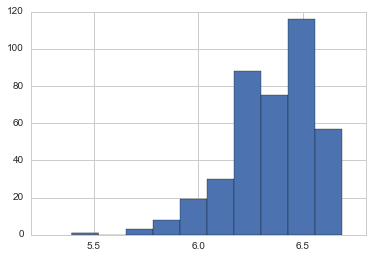

In [111]:
log_gre = np.log(gre)
plt.hist(log_gre, bins=10)

(array([  1.,   4.,   9.,  17.,  38.,  52.,  69.,  69.,  65.,  73.]),
 array([ 0.81536481,  0.87245777,  0.92955072,  0.98664368,  1.04373663,
         1.10082959,  1.15792254,  1.2150155 ,  1.27210845,  1.32920141,
         1.38629436]),
 <a list of 10 Patch objects>)

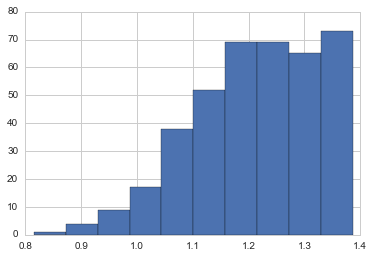

In [112]:
log_gpa = np.log(gpa)
plt.hist(log_gpa, bins = 10)

#### 3. Advanced: Impute missing data